In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Multi-Class Prediction of Cirrhosis OutcomesUntitled folder/data/train.csv")
df.drop("id", axis = 1, inplace = True)
df

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


In [ ]:
df.isna().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [ ]:
object_types = df.select_dtypes(include = "object").columns
dict1 = {}
for col in object_types:
  dict1[col] = [df[col].nunique()]
unique_obj = pd.DataFrame(dict1)
unique_obj

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Status
0,2,2,2,2,2,3,3


In [ ]:
binary = ["Drug", "Sex", "Ascites", "Hepatomegaly", "Spiders"]
multi_category = ["Edema"]

<Axes: xlabel='Status', ylabel='count'>

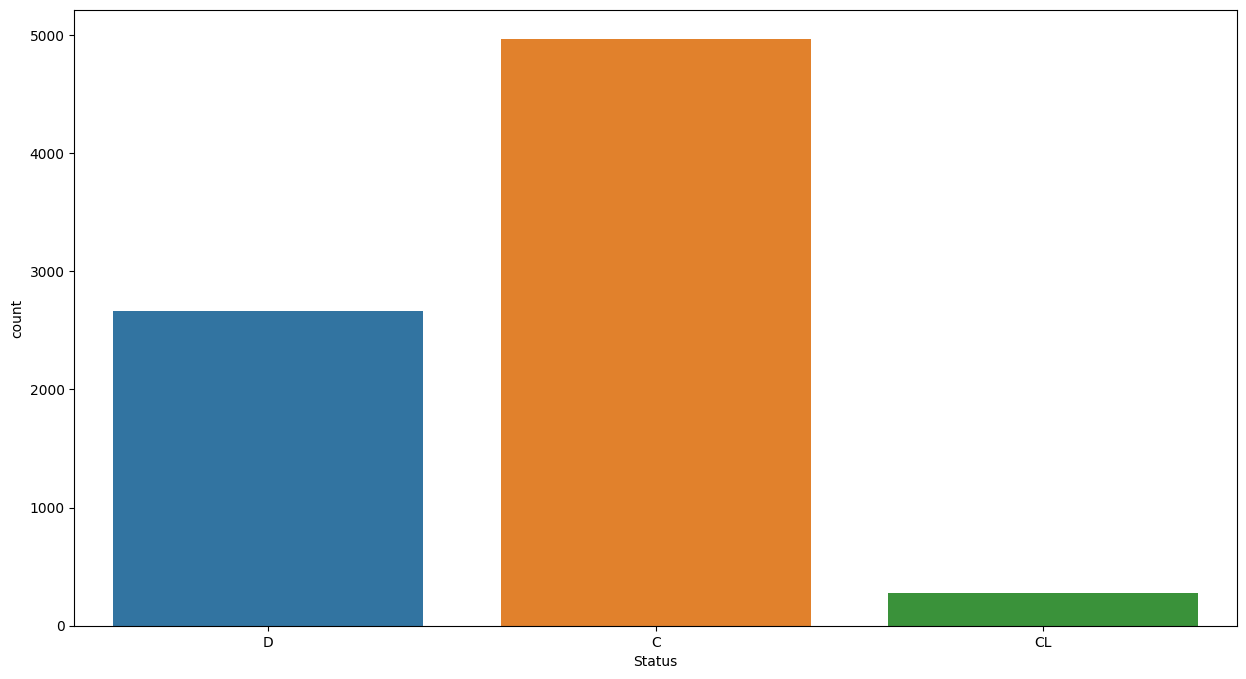

In [ ]:
plt.figure(figsize = (15, 8))
sns.countplot(df, x = "Status")

In [ ]:
# df.drop("id", axis = 1, inplace = True)
df["Stage"] = df["Stage"].astype("category")
df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000


In [ ]:
continuous_var = df.select_dtypes(include = [int, float]).columns

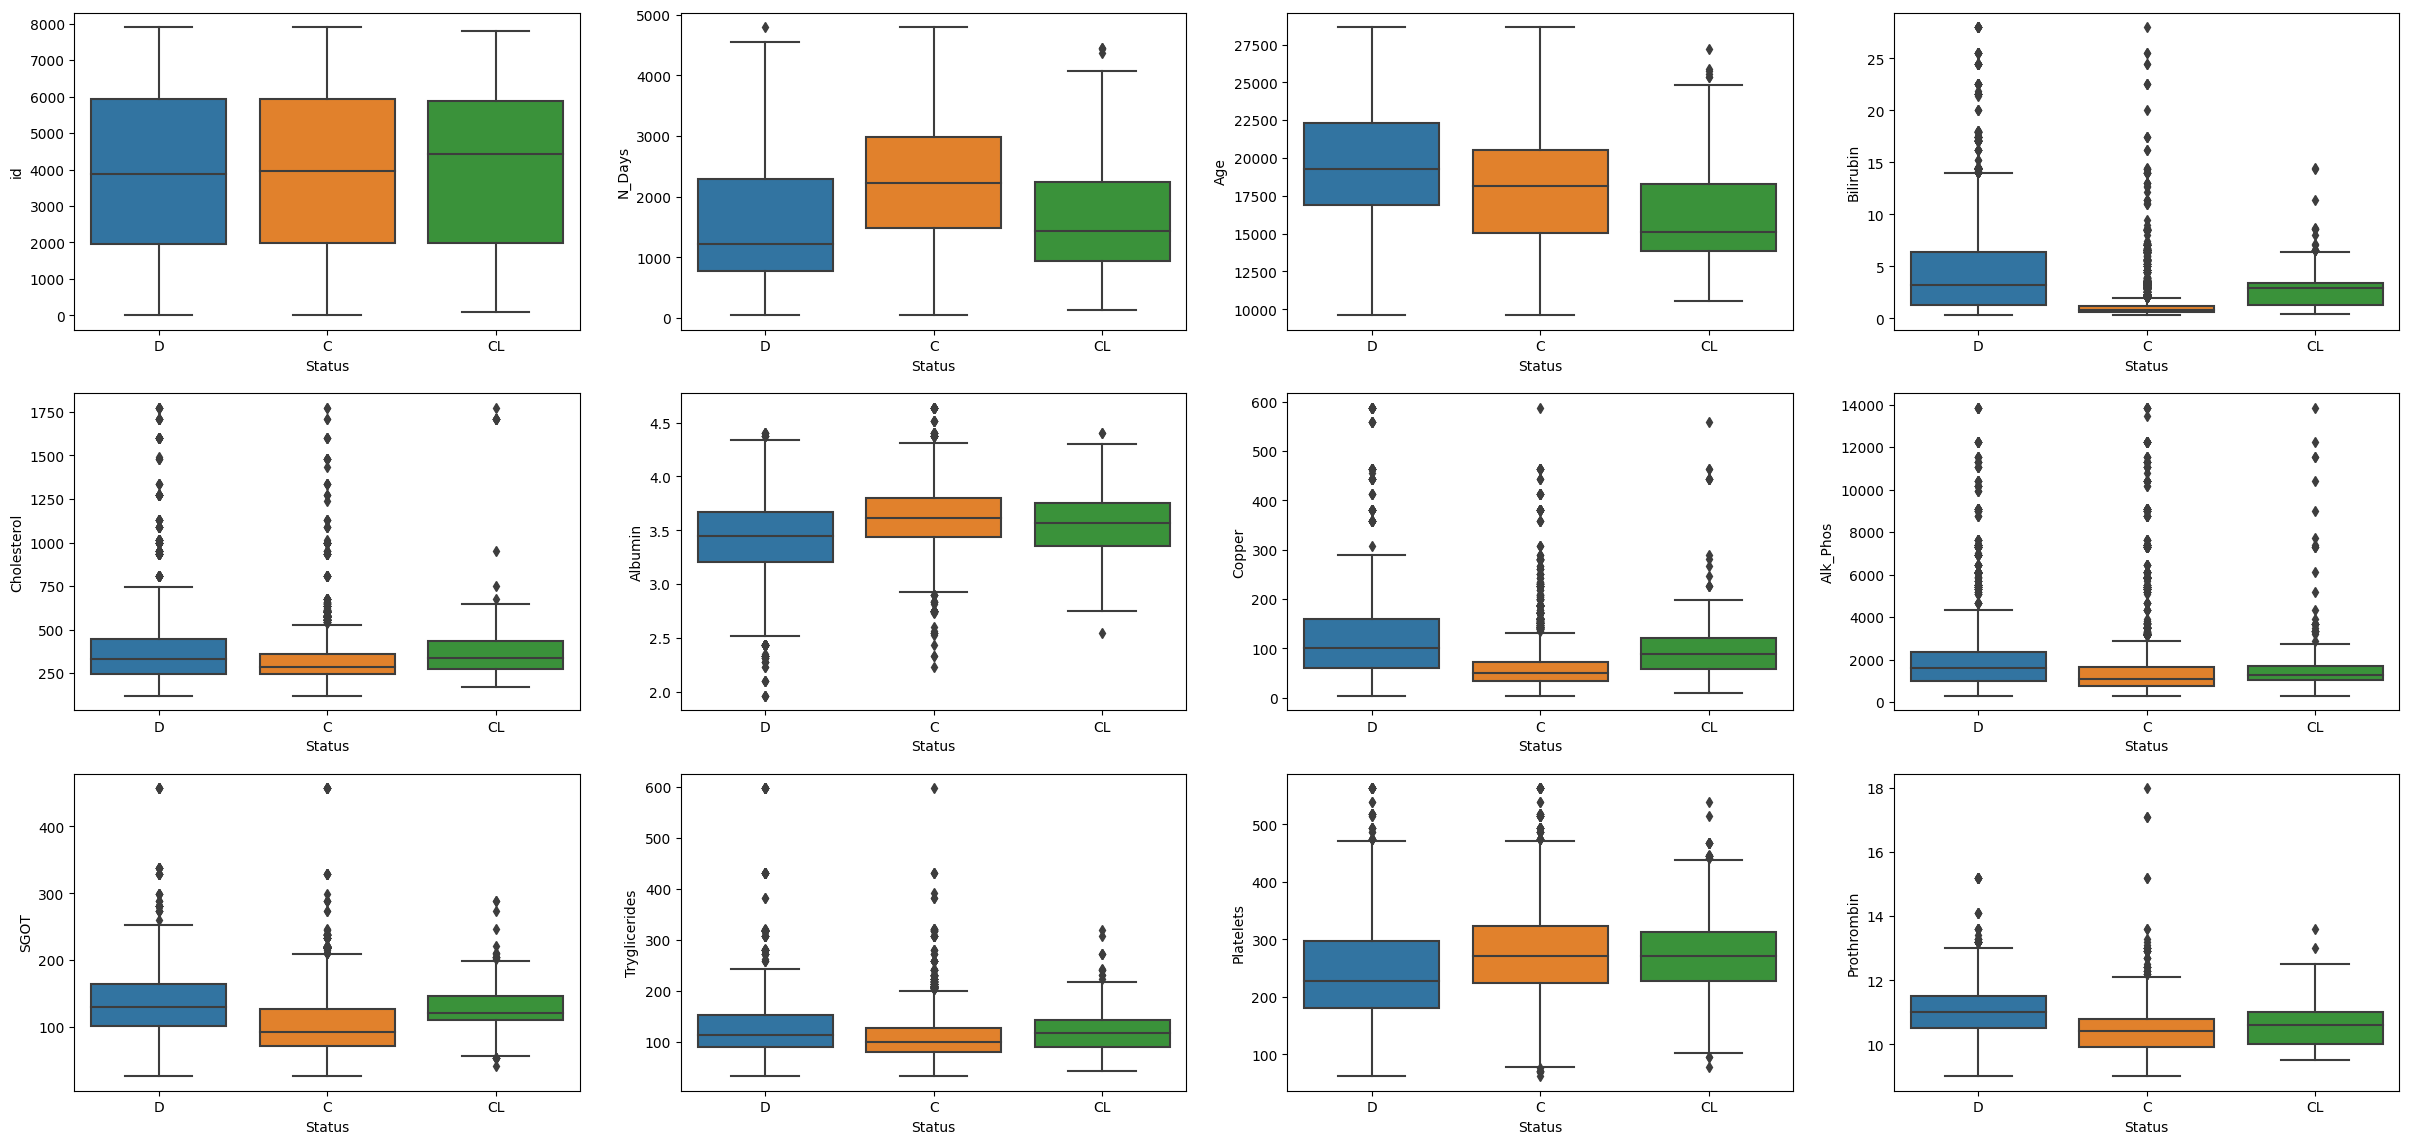

In [ ]:
fig, axes = plt.subplots(3,4, figsize = (30, 14))
col = 0
row = 0
for i in continuous_var:
  sns.boxplot(df, x = "Status", y = i, ax = axes[row, col])
  col +=1
  if col == 4:
    row += 1
    col = 0

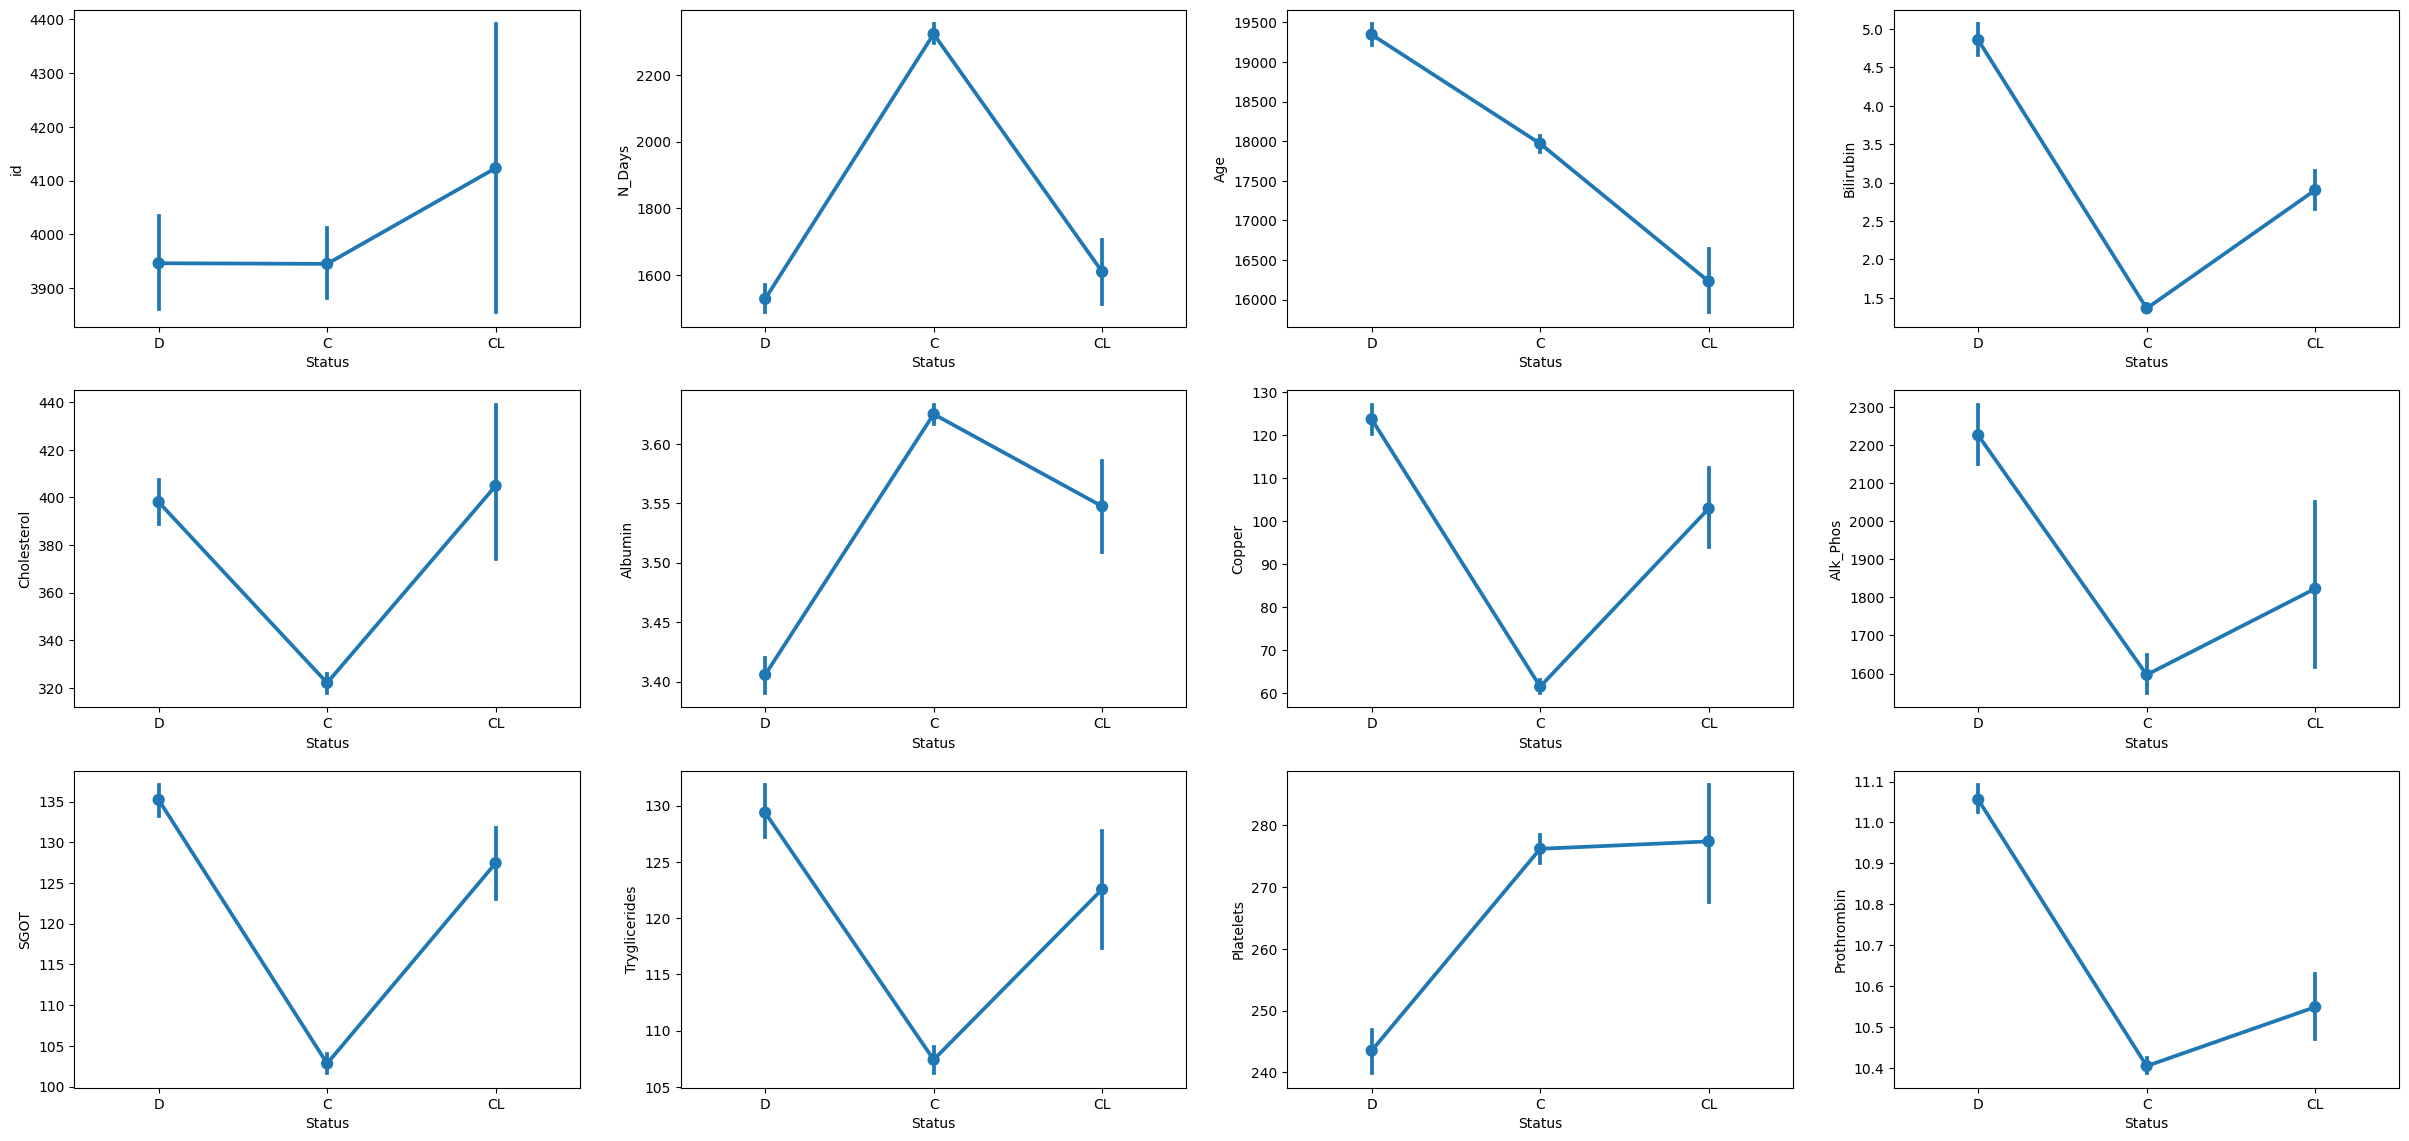

In [ ]:
fig, axes = plt.subplots(3,4, figsize = (30, 14))
col = 0
row = 0
for i in continuous_var:
  sns.pointplot(df, x = "Status", y = i, ax = axes[row, col])
  col +=1
  if col == 4:
    row += 1
    col = 0

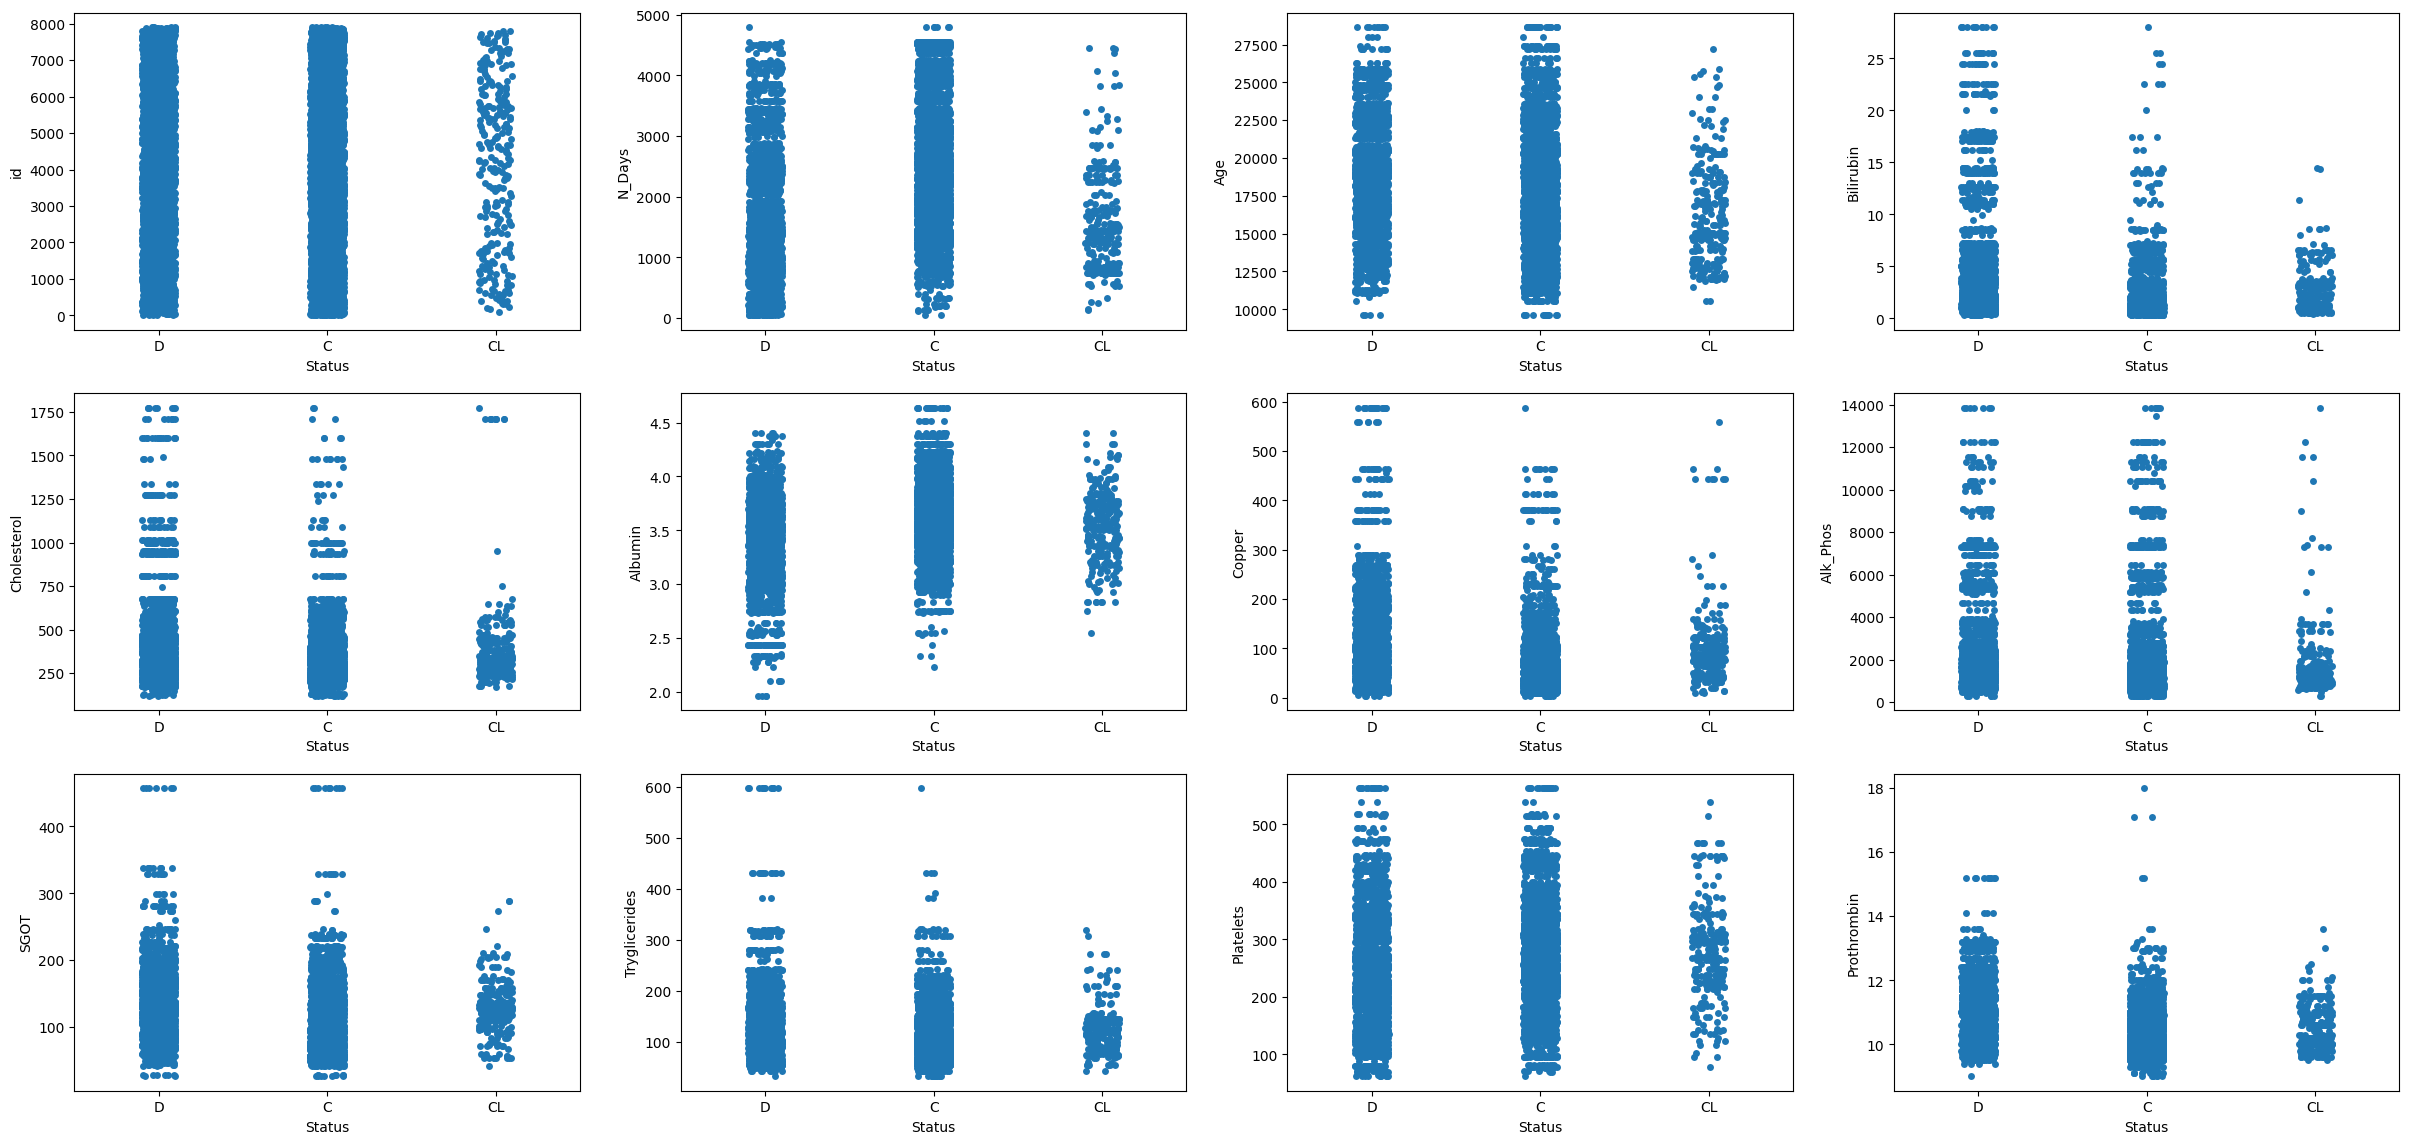

In [ ]:
fig, axes = plt.subplots(3,4, figsize = (30, 14))
col = 0
row = 0
for i in continuous_var:
  sns.stripplot(df, x = "Status", y = i, ax = axes[row, col])
  col +=1
  if col == 4:
    row += 1
    col = 0

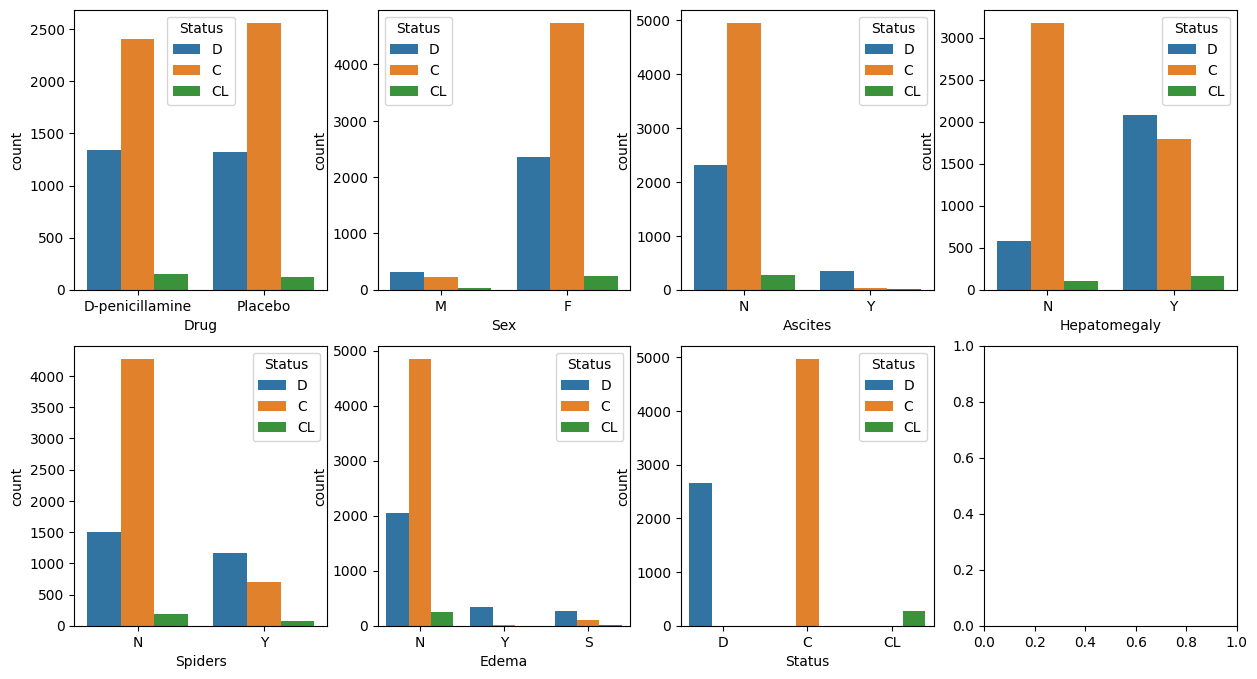

In [ ]:
fig, axes = plt.subplots(2, 4, figsize = (15, 8))
col = 0
row = 0
for i in object_types:
  sns.countplot(df, x = i, hue = "Status", ax = axes[row, col])
  col += 1
  if col == 4:
    col = 0
    row += 1


In [ ]:
df_tmp = df.copy()
for col in object_types:
  if pd.api.types.is_object_dtype(df_tmp[col]):
    df_tmp[col] = df_tmp[col].astype('category')
for col in object_types:
  if pd.api.types.is_categorical_dtype(df_tmp[col]):
    df_tmp[col] = df_tmp[col].cat.codes

<ipython-input-71-4e8f0cf404c2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_tmp.corr(), annot = True)


<Axes: >

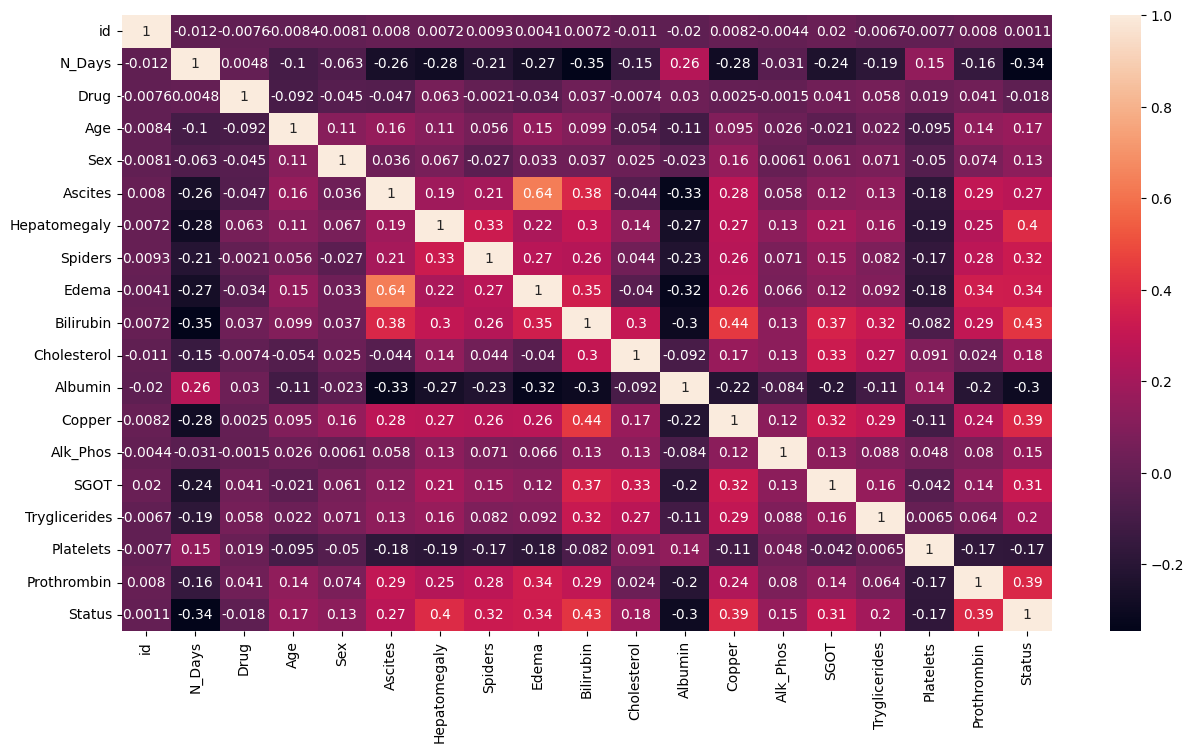

In [ ]:
plt.figure(figsize = (15, 8))
sns.heatmap(df_tmp.corr(), annot = True)

In [ ]:
df

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


In [ ]:
for i in binary:
  if pd.api.types.is_object_dtype(df[i]):
    df[i] = df[i].astype("category")
for i in binary:
  if pd.api.types.is_categorical_dtype(df[i]):
    df[i] = df[i].cat.codes
df


,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,0,21532,1,0,0,0,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,1,19237,0,0,0,0,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,1,13727,0,0,1,1,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,1,18460,0,0,0,0,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,1,16658,0,0,1,0,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1166,0,16839,0,0,0,0,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,1492,1,17031,0,0,1,0,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,1576,0,25873,0,0,0,1,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,3584,0,22960,1,0,1,0,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder(sparse = False)
transformer = ColumnTransformer([("one_hot", one_hot, multi_category)], remainder = "passthrough")

In [ ]:
from sklearn.model_selection import train_test_split
df["Status"] = df["Status"].astype("category").cat.codes
X = df.drop("Status", axis = 1)
y = df["Status"]
transformed_X = transformer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2, random_state= 42)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(transformed_X, y)


RandomForestClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score

def plotting(model, cv = 5, scoring = "accuracy"):
  train_score = cross_val_score(model, X_train, y_train, cv = cv, scoring = scoring)
  test_score = cross_val_score(model, X_test, y_test, cv = cv, scoring = scoring)
  plt.figure(figsize = (15, 8))
  plt.plot(train_score, label = f"Training {scoring}")
  plt.plot(test_score, label = f"Testing {scoring}")
  plt.xlabel("Count")
  plt.ylabel(scoring.title())
  plt.legend()

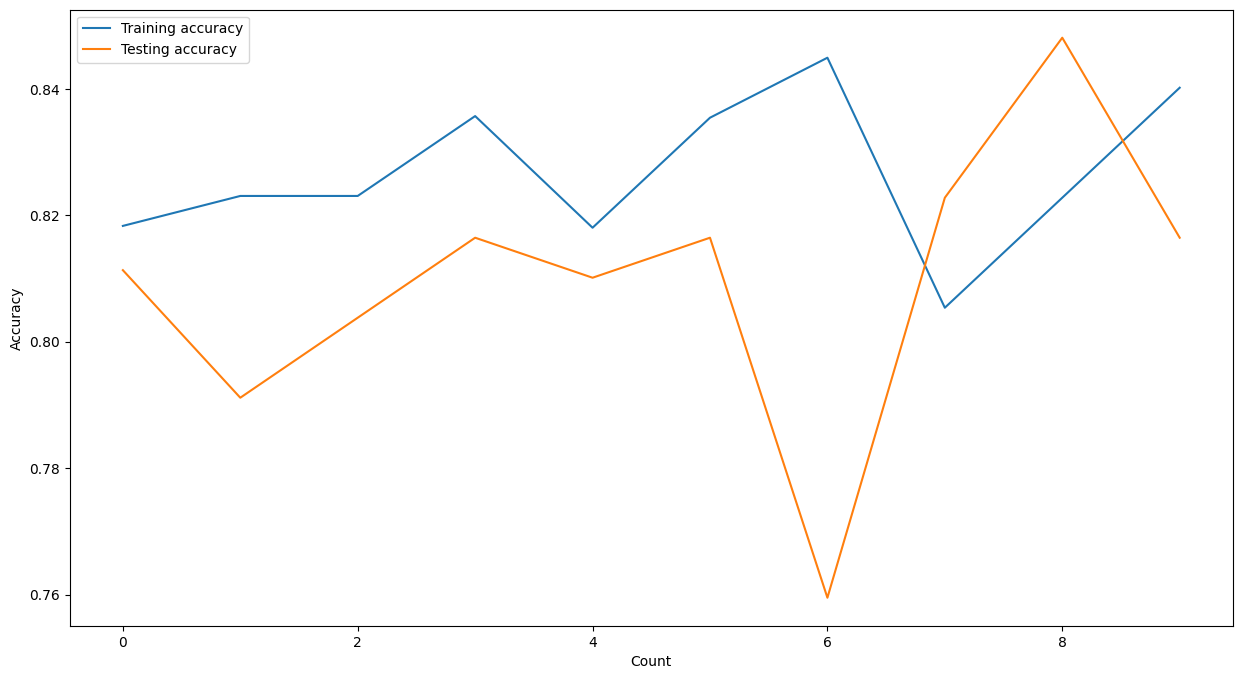

In [ ]:
plotting(RFC, 10)

In [ ]:
y_pred_1 = RFC.predict(X_test)
print(classification_report(y_test, y_pred_1))

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_1)

<Axes: >

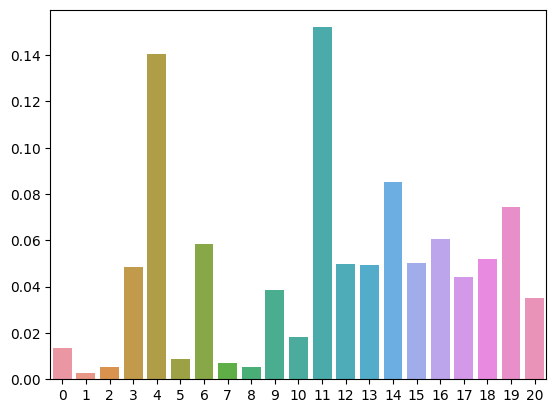

In [ ]:
importances = RFC.feature_importances_
sns.barplot(x = np.arange(0, len(RFC.feature_importances_)), y = RFC.feature_importances_)

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC()

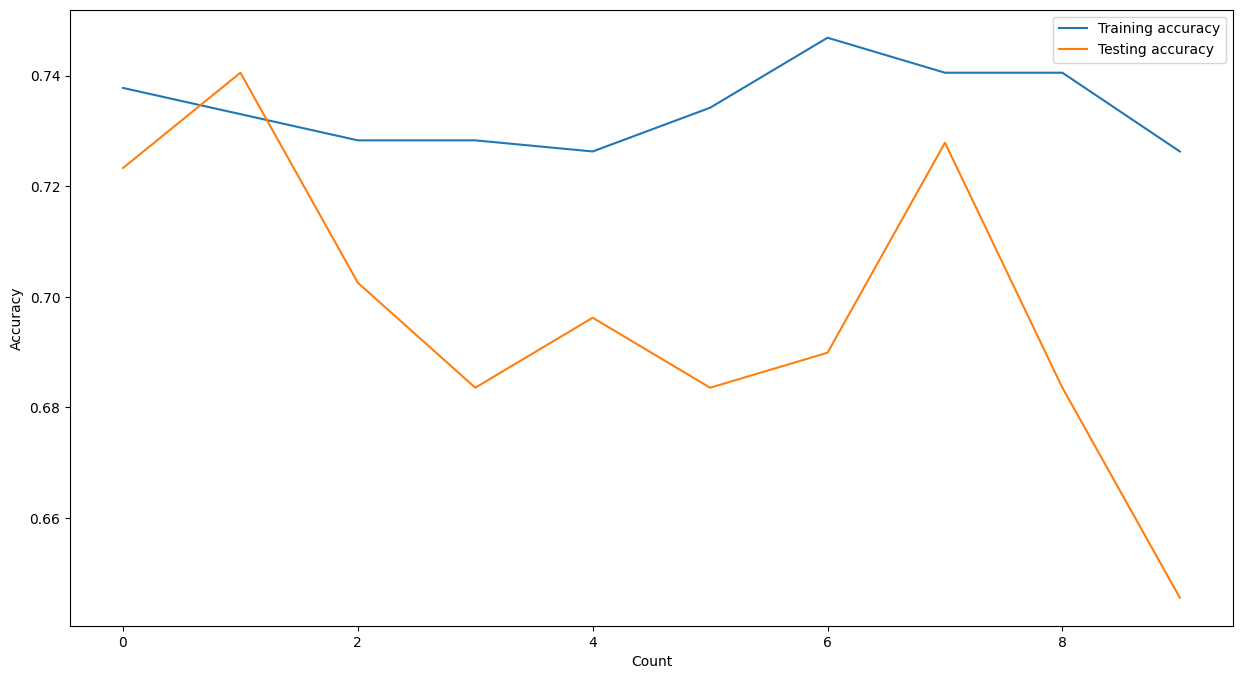

In [ ]:
plotting(svc, cv = 10)

In [ ]:
y_pred_2 = svc.predict(X_test)
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           C       0.71      0.92      0.80       966
          CL       0.00      0.00      0.00        52
           D       0.76      0.43      0.55       563

    accuracy                           0.72      1581
   macro avg       0.49      0.45      0.45      1581
weighted avg       0.70      0.72      0.69      1581



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


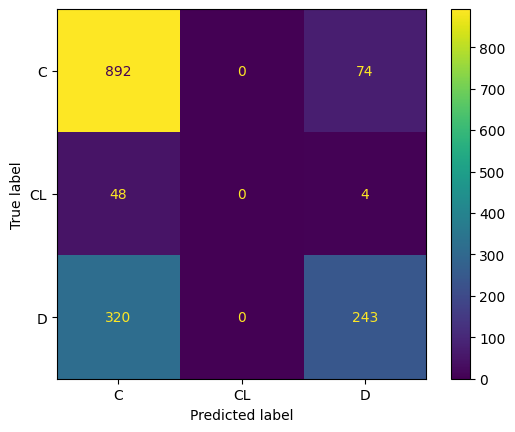

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

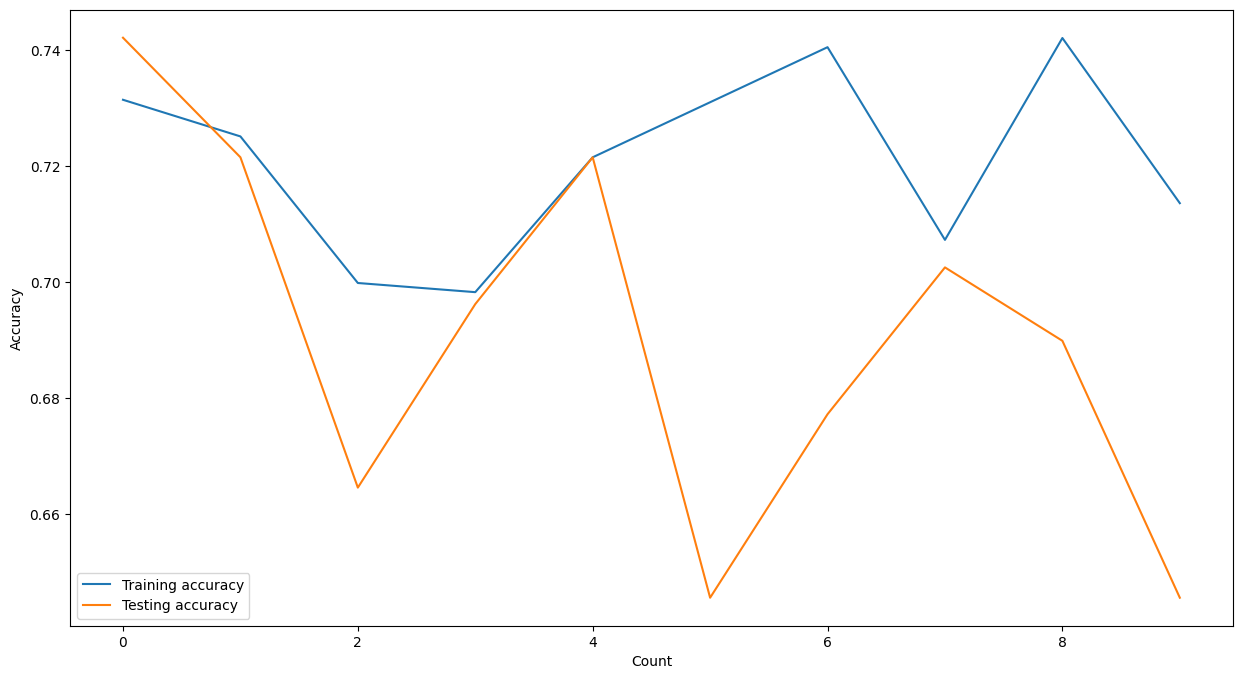

In [ ]:
plotting(knn, cv = 10)

Text(0, 0.5, 'Accuracy')

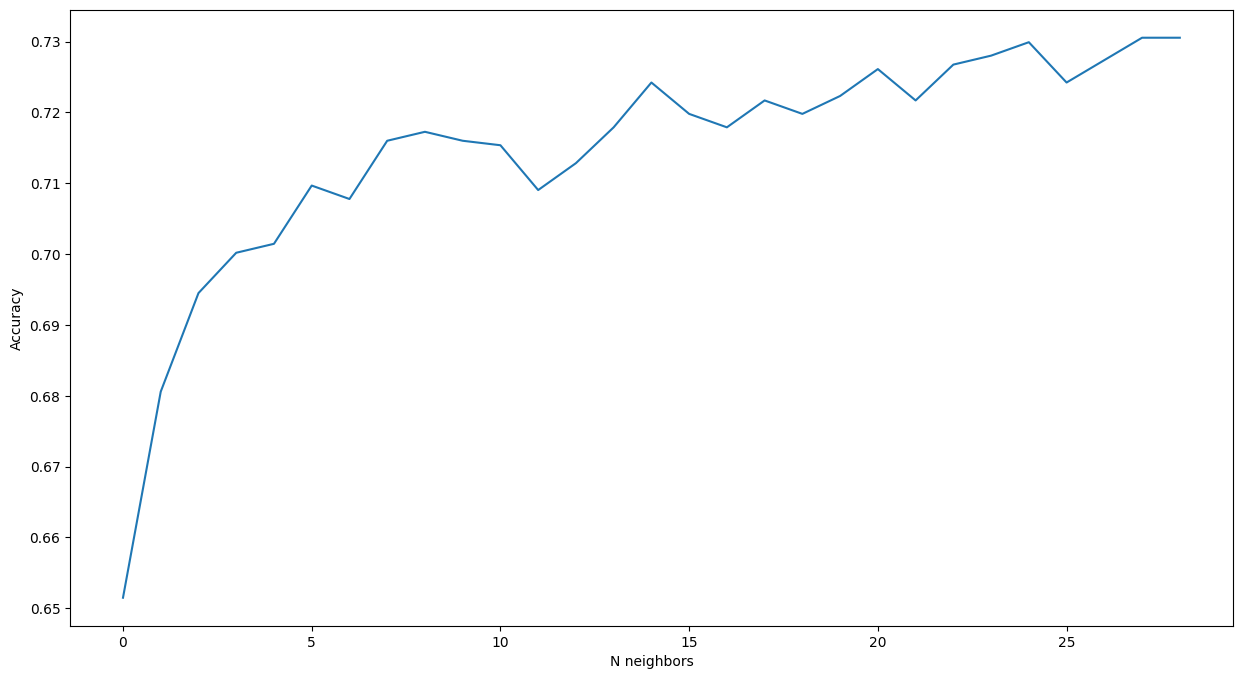

In [ ]:
n_neighbors = np.arange(1,30)
score = []
for i in n_neighbors:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  score.append(knn.score(X_test, y_test))
plt.figure(figsize = (15, 8))
plt.plot(score)
plt.xlabel("N neighbors")
plt.ylabel("Accuracy")


In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

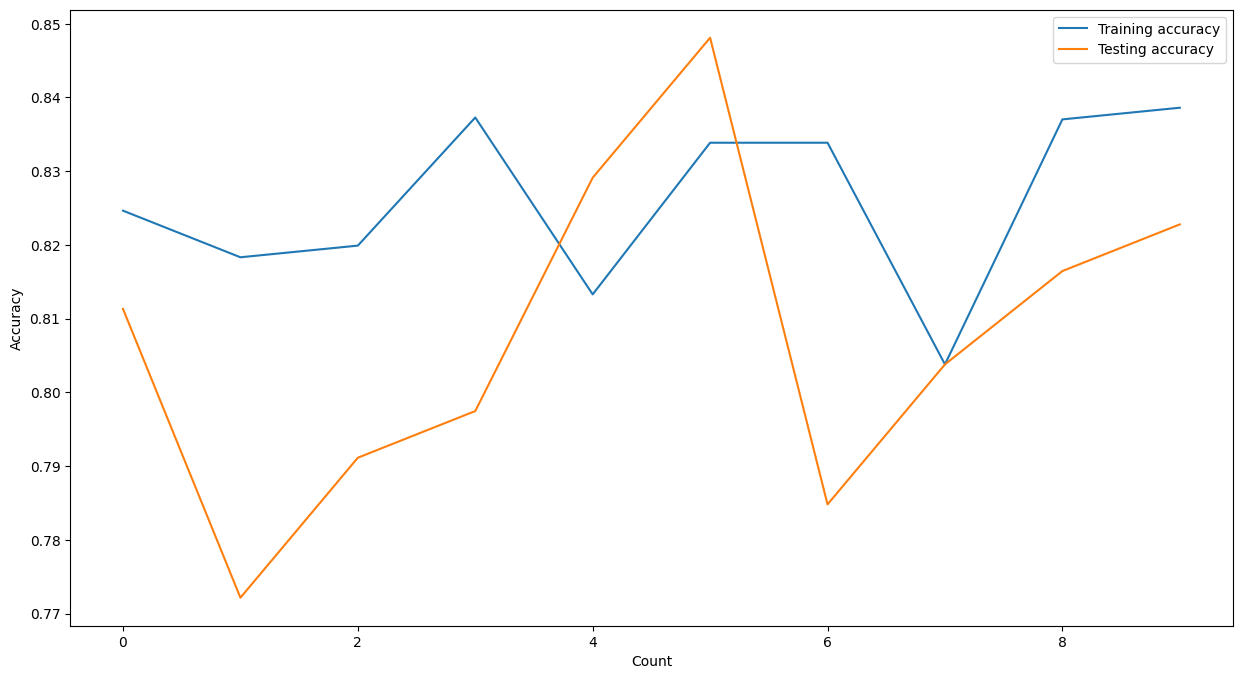

In [ ]:
plotting(xgb, cv = 10)

In [ ]:
y_pred_3 = xgb.predict(X_test)
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       966
           1       0.50      0.15      0.24        52
           2       0.83      0.74      0.78       563

    accuracy                           0.83      1581
   macro avg       0.72      0.60      0.63      1581
weighted avg       0.82      0.83      0.82      1581



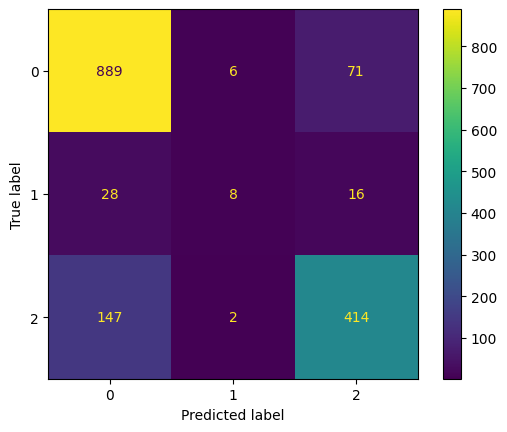

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_3)

In [ ]:
import tensorflow as tf
y = df["Status"]
y_categorical = tf.keras.utils.to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y_categorical, test_size = 0.2, random_state = 42)

deep_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(15, activation = "relu", input_dim = 21),
    tf.keras.layers.Dense(20, activation = "relu"),
    tf.keras.layers.Dense(3, activation = "softmax")
])
deep_model.compile(optimizer = tf.keras.optimizers.Adam(0.01), loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ["accuracy"])

In [ ]:
r = deep_model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/10
198/198 [==============================] - 3s 8ms/step - loss: 137.4673 - accuracy: 0.6039 - val_loss: 49.1928 - val_accuracy: 0.6243
Epoch 2/10
198/198 [==============================] - 1s 5ms/step - loss: 36.1920 - accuracy: 0.6373 - val_loss: 28.2290 - val_accuracy: 0.6521
Epoch 3/10
198/198 [==============================] - 0s 2ms/step - loss: 25.6769 - accuracy: 0.6429 - val_loss: 15.3183 - val_accuracy: 0.7565
Epoch 4/10
198/198 [==============================] - 0s 2ms/step - loss: 15.6928 - accuracy: 0.6477 - val_loss: 9.5411 - val_accuracy: 0.6799
Epoch 5/10
198/198 [==============================] - 0s 2ms/step - loss: 9.8464 - accuracy: 0.6564 - val_loss: 16.5828 - val_accuracy: 0.6736
Epoch 6/10
198/198 [==============================] - 0s 2ms/step - loss: 7.4115 - accuracy: 0.6607 - val_loss: 3.5860 - val_accuracy: 0.7521
Epoch 7/10
198/198 [==============================] - 0s 2ms/step - loss: 4.4088 - accuracy: 0.6608 - val_loss: 2.7042 - val_accuracy: 0.75

In [ ]:
deep_predict = deep_model.predict(X_test)
deep_predict = deep_predict.argmax(axis = 1)
deep_predict

50/50 [==============================] - 0s 4ms/step


array([0, 2, 0, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_test.argmax(axis = 1), deep_predict))

              precision    recall  f1-score   support

           0       0.69      0.96      0.80       966
           1       0.33      0.02      0.04        52
           2       0.82      0.32      0.46       563

    accuracy                           0.70      1581
   macro avg       0.61      0.44      0.43      1581
weighted avg       0.72      0.70      0.66      1581



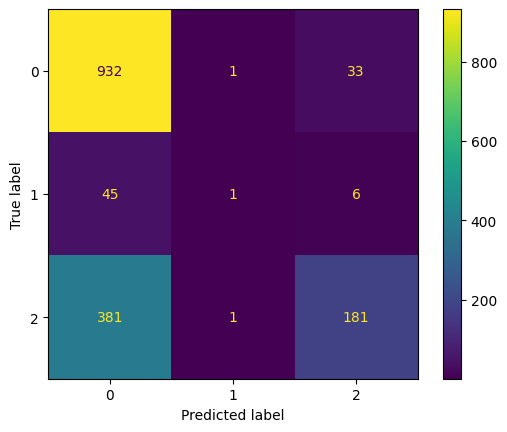

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis = 1), deep_predict)

Text(0, 0.5, 'Accuracy')

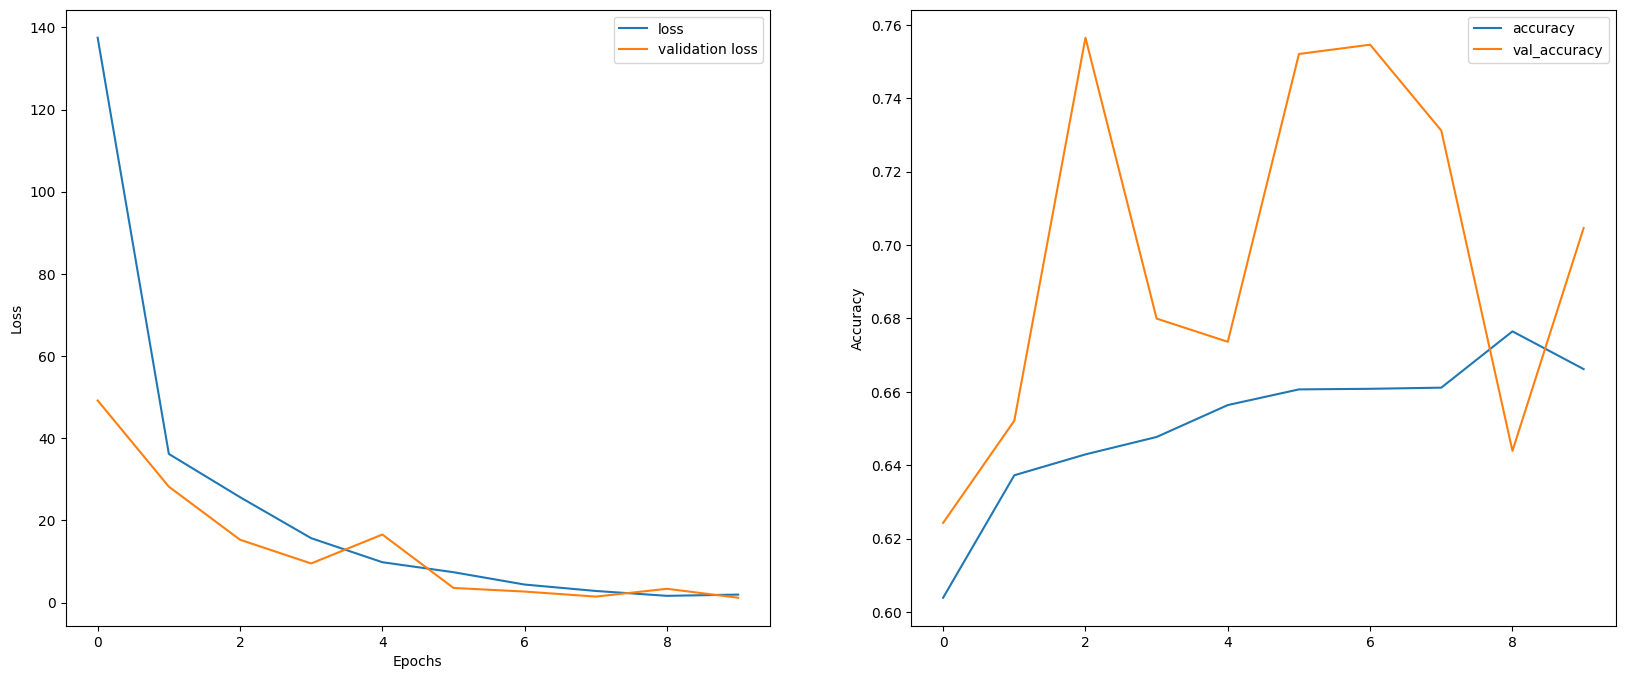

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (20, 8))
axes[0].plot(r.history["loss"], label = "loss")
axes[0].plot(r.history["val_loss"], label = "validation loss")
axes[0].legend()
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")


axes[1].plot(r.history['accuracy'], label = "accuracy")
axes[1].plot(r.history["val_accuracy"], label = "val_accuracy")
axes[1].legend()
axes[0].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")

In [ ]:
df_val = pd.read_csv("/content/drive/MyDrive/Multi-Class Prediction of Cirrhosis OutcomesUntitled folder/data/test.csv")
# df_val.drop("id", axis = 1, inplace = True)
df_val

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,13171,2870,Placebo,12279,F,N,N,N,N,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0
5267,13172,1770,Placebo,24803,F,N,N,N,N,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0
5268,13173,3707,D-penicillamine,16990,F,N,Y,N,N,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0
5269,13174,1216,Placebo,11773,F,N,N,N,N,0.7,329.0,3.80,52.0,678.0,57.00,126.0,306.0,10.2,1.0


In [ ]:
for i in binary:
  print(i)
  if pd.api.types.is_object_dtype(df_val[i]):
    df_val[i] = df_val[i].astype("category")
for i in binary:
  if pd.api.types.is_categorical_dtype(df_val[i]):
    df_val[i] = df_val[i].cat.codes
df_val

Drug
Sex
Ascites
Hepatomegaly
Spiders


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,0,19724,0,0,1,0,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,0,14975,0,0,0,0,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,1,13149,0,0,1,0,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,0,20510,0,0,0,0,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,0,21904,0,0,1,0,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,13171,2870,1,12279,0,0,0,0,N,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0
5267,13172,1770,1,24803,0,0,0,0,N,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0
5268,13173,3707,0,16990,0,0,1,0,N,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0
5269,13174,1216,1,11773,0,0,0,0,N,0.7,329.0,3.80,52.0,678.0,57.00,126.0,306.0,10.2,1.0


In [ ]:
X_val = df_val.drop("Stage", axis = 1)
y_val = df_val["Stage"]

transformed_Xval = transformer.fit_transform(X_val)
df_val.drop("id", axis = 1, inplace = True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
predict_proba = RFC.predict_proba(transformed_Xval)
predict_proba

array([[0.55, 0.03, 0.42],
       [0.56, 0.05, 0.39],
       [0.35, 0.02, 0.63],
       ...,
       [0.52, 0.04, 0.44],
       [0.61, 0.02, 0.37],
       [0.55, 0.04, 0.41]])

In [ ]:
submission = pd.read_csv("/content/drive/MyDrive/Multi-Class Prediction of Cirrhosis OutcomesUntitled folder/data/sample_submission.csv")
print(submission)

         id  Status_C  Status_CL  Status_D
0      7905  0.628084   0.034788  0.337128
1      7906  0.628084   0.034788  0.337128
2      7907  0.628084   0.034788  0.337128
3      7908  0.628084   0.034788  0.337128
4      7909  0.628084   0.034788  0.337128
...     ...       ...        ...       ...
5266  13171  0.628084   0.034788  0.337128
5267  13172  0.628084   0.034788  0.337128
5268  13173  0.628084   0.034788  0.337128
5269  13174  0.628084   0.034788  0.337128
5270  13175  0.628084   0.034788  0.337128

[5271 rows x 4 columns]


In [ ]:
status_c = []
status_c1 = []
status_d = []

for i in predict_proba:
  status_c.append(i[0])
  status_c1.append(i[1])
  status_d.append(i[2])


In [ ]:
prediction = pd.DataFrame({
    "Status_C_pred": status_c,
    "Status_C1_pred": status_c1,
    "Status_D_pred": status_d

})
prediction

,Status_C_pred,Status_C1_pred,Status_D_pred
0,0.07,0.00,0.93
1,0.86,0.01,0.13
2,0.03,0.01,0.96
3,1.00,0.00,0.00
4,0.78,0.04,0.18
...,...,...,...
7900,0.84,0.02,0.14
7901,0.91,0.04,0.05
7902,0.15,0.01,0.84
7903,0.68,0.00,0.32


In [ ]:
prediction.to_csv("submission_file.csv")

In [ ]:
X

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,999,0,21532,1,0,0,0,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0
1,1,2574,1,19237,0,0,0,0,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0
2,2,3428,1,13727,0,0,1,1,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0
3,3,2576,1,18460,0,0,0,0,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0
4,4,788,1,16658,0,0,1,0,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,0,16839,0,0,0,0,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0
7901,7901,1492,1,17031,0,0,1,0,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0
7902,7902,1576,0,25873,0,0,0,1,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0
7903,7903,3584,0,22960,1,0,1,0,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0


In [ ]:
y_preds = RFC.predict(transformed_Xval)
print(classification_report(y_preds, y_val))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4965
           1       1.00      1.00      1.00       275
           2       1.00      1.00      1.00      2665

    accuracy                           1.00      7905
   macro avg       1.00      1.00      1.00      7905
weighted avg       1.00      1.00      1.00      7905



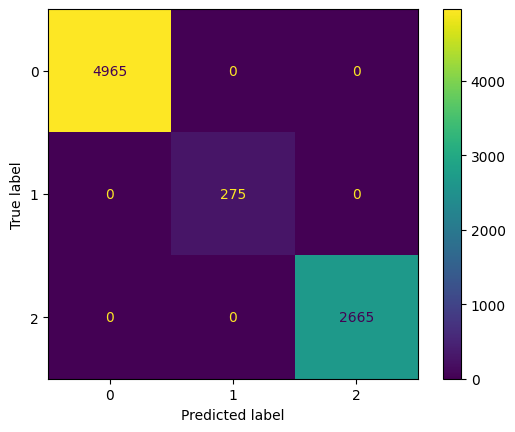

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_val, y_preds)

In [ ]:
submission.to_csv("submission_file.csv")

In [ ]:
df_val = pd.read_csv("/content/drive/MyDrive/Multi-Class Prediction of Cirrhosis OutcomesUntitled folder/data/test.csv")
ids = df_val["id"].to_list()

In [ ]:
len(ids)

5271

In [ ]:
submission.shape

(7905, 3)

In [ ]:
df_val

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,13171,2870,Placebo,12279,F,N,N,N,N,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0
5267,13172,1770,Placebo,24803,F,N,N,N,N,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0
5268,13173,3707,D-penicillamine,16990,F,N,Y,N,N,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0
5269,13174,1216,Placebo,11773,F,N,N,N,N,0.7,329.0,3.80,52.0,678.0,57.00,126.0,306.0,10.2,1.0


In [ ]:
transformed_Xval.shape

(7905, 20)

In [ ]:
df_val

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,13171,2870,Placebo,12279,F,N,N,N,N,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0
5267,13172,1770,Placebo,24803,F,N,N,N,N,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0
5268,13173,3707,D-penicillamine,16990,F,N,Y,N,N,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0
5269,13174,1216,Placebo,11773,F,N,N,N,N,0.7,329.0,3.80,52.0,678.0,57.00,126.0,306.0,10.2,1.0


,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,0,21532,1,0,0,0,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,2
1,2574,1,19237,0,0,0,0,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,0
2,3428,1,13727,0,0,1,1,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,2
3,2576,1,18460,0,0,0,0,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,0
4,788,1,16658,0,0,1,0,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,1166,0,16839,0,0,0,0,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,0
7901,1492,1,17031,0,0,1,0,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,0
7902,1576,0,25873,0,0,0,1,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,2
7903,3584,0,22960,1,0,1,0,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,2
